<h3 style="font-family: Trebuchet MS;background-color:#4F359B;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>1. Web Scrapping 📚 </centre></strong></h3>

## Topic: Mobile Phone
## Group2: Ken Kaya, Ry Socheat, Srey Vat
## BeautifulSoup WebScraping

<h3 style="font-family: Trebuchet MS;background-color:#4F359B;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from bs4 import BeautifulSoup
import requests
import re
import plotly.express as px
import markdown
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA

### Base URL and URL:

In [73]:
Base_url="https://www.flipkart.com/search?q=mobile%20&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"

In [74]:
url="https://www.flipkart.com/search?q=mobile%20&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="

### Status_Code:

In [75]:
req=requests.get(Base_url)

In [76]:
req

<Response [200]>

### Creating Empty Lists:

In [77]:
n1=[]
m1=[]
s1=[]
c1=[]
b1=[]
pr1=[]
w1=[]
r1=[]
sp1=[]
d1=[]

In [78]:
for i in range(1,41):
    url=Base_url+str(i)
    req=requests.get(url)
    soup=BeautifulSoup(req.text,"html.parser")
    name=soup.find_all("div",class_="_4rR01T")
    memory=soup.find_all("li",class_="rgWa7D")
    screen=soup.find_all("li",class_="rgWa7D")
    cameras=soup.find_all("li",class_="rgWa7D")
    battery=soup.find_all("li",class_="rgWa7D")
    processor=soup.find_all("li",class_="rgWa7D")
    warrenty=soup.find_all("li",class_="rgWa7D")
    rating=soup.find_all("span",class_="_2_R_DZ")
    selling_price=soup.find_all("div",class_="_30jeq3 _1_WHN1")
    off=soup.find_all("div",class_="_3Ay6Sb")
    for n,m,s,c,b,p1,w,r,sp,o in zip(name,memory,screen,cameras,battery,processor,warrenty,rating,selling_price,off):
        n1.append(n.text)
        m1.append(m.text)
        s1.append(s.text)
        c1.append(c.text)
        b1.append(b.text)
        pr1.append(p1.text)
        w1.append(w.text)
        r1.append(r.text)
        sp1.append(sp.text)
        d1.append(o.text)    

### Print All data to check it is appended or not:

In [79]:
print(n1,m1,s1,c1,b1,pr1,w1,r1,sp1,d1)

['POCO C55 (Forest Green, 128 GB)', 'POCO C50 (Royal Blue, 32 GB)', 'POCO C55 (Forest Green, 64 GB)', 'POCO C55 (Power Black, 64 GB)', 'POCO C55 (Cool Blue, 64 GB)', 'POCO C55 (Power Black, 128 GB)', 'POCO C51 (Royal Blue, 64 GB)', 'vivo T2x 5G (Aurora Gold, 128 GB)', 'vivo T2x 5G (Marine Blue, 128 GB)', 'vivo T2x 5G (Glimmer Black, 128 GB)', 'vivo T2x 5G (Aurora Gold, 128 GB)', 'vivo T2x 5G (Glimmer Black, 128 GB)', 'vivo T2x 5G (Aurora Gold, 128 GB)', 'vivo T2x 5G (Marine Blue, 128 GB)', 'Infinix Smart 7 HD (Green Apple, 64 GB)', 'REDMI 11 Prime (Flashy Black, 128 GB)', 'MOTOROLA e13 (Cosmic Black, 64 GB)', 'REDMI 11 Prime (Peppy Purple, 128 GB)', 'POCO C50 (Country Green, 32 GB)', 'POCO C55 (Cool Blue, 128 GB)', 'Infinix SMART 7 (Night Black, 64 GB)', 'Infinix SMART 7 (Azure Blue, 64 GB)', 'Infinix SMART 7 (Emerald Green, 64 GB)', 'MOTOROLA g13 (Lavender Blue, 128 GB)', 'POCO C55 (Forest Green, 128 GB)', 'POCO C50 (Royal Blue, 32 GB)', 'POCO C55 (Forest Green, 64 GB)', 'POCO C55 (Po

### Create Data Frame:

In [80]:
df=pd.DataFrame({"Mobile_name":n1,"Processor":pr1,"Storage":m1,"Screen_Length":s1,"Camera":c1,"Battery":b1,"Warranty":w1,"Rating & Reviews":r1,"Selling_Price":sp1," Discount":d1})

In [81]:
df.head(5)

,Mobile_name,Processor,Storage,Screen_Length,Camera,Battery,Warranty,Rating & Reviews,Selling_Price,Discount
0,"POCO C55 (Forest Green, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,"19,361 Ratings & 1,137 Reviews","₹9,999",28% off
1,"POCO C50 (Royal Blue, 32 GB)",17.04 cm (6.71 inch) HD+ Display,17.04 cm (6.71 inch) HD+ Display,17.04 cm (6.71 inch) HD+ Display,17.04 cm (6.71 inch) HD+ Display,17.04 cm (6.71 inch) HD+ Display,17.04 cm (6.71 inch) HD+ Display,"37,874 Ratings & 1,821 Reviews","₹5,499",38% off
2,"POCO C55 (Forest Green, 64 GB)",50MP Dual Rear Camera | 5MP Front Camera,50MP Dual Rear Camera | 5MP Front Camera,50MP Dual Rear Camera | 5MP Front Camera,50MP Dual Rear Camera | 5MP Front Camera,50MP Dual Rear Camera | 5MP Front Camera,50MP Dual Rear Camera | 5MP Front Camera,"30,975 Ratings & 1,844 Reviews","₹7,499",37% off
3,"POCO C55 (Power Black, 64 GB)",5000 mAh Battery,5000 mAh Battery,5000 mAh Battery,5000 mAh Battery,5000 mAh Battery,5000 mAh Battery,"30,975 Ratings & 1,844 Reviews","₹7,499",37% off
4,"POCO C55 (Cool Blue, 64 GB)",Mediatek Helio G85 Processor,Mediatek Helio G85 Processor,Mediatek Helio G85 Processor,Mediatek Helio G85 Processor,Mediatek Helio G85 Processor,Mediatek Helio G85 Processor,"30,975 Ratings & 1,844 Reviews","₹7,499",37% off


### Save DataFrame to .CSV file:

In [82]:
df.to_csv("Mobiles data.csv")

<h3 style="font-family: Trebuchet MS;background-color:#4F359B;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>1. EDA (Explore Data Analysis) 📚 </centre></strong></h3>

### Introduction:
#### This dataset containing specs of various Mobile brands in India has been scraped from an ecommerce website 'Flipkart'. This dataset has 960 samples with 8 attributes. There are some missing values as well.

1. Mobile Name - Name of the Mobile Manufacturer .
2. Brand - Brand of the Mobile Phone.
3. Model- Model of the Mobile Phone.
4. Color- Color of the model.
5. Storage- ROM of the model (32GB,64GB,128GB,256GB, etc.).
6. Rating - It is the user rating on the model based on reviews (out of 5).
7. Reviews - It is the user Reviews on the Mobile Name.
8. Selling Price- Selling Price/Discounted Price of the model when this data was scraped. Ideally price indicates the discounted price of the model.
9. **Original Price** - Actual price of the model.

In [83]:
df['Mobile_name']

0             POCO C55 (Forest Green, 128 GB)
1                POCO C50 (Royal Blue, 32 GB)
2              POCO C55 (Forest Green, 64 GB)
3               POCO C55 (Power Black, 64 GB)
4                 POCO C55 (Cool Blue, 64 GB)
                        ...                  
955              POCO C55 (Cool Blue, 128 GB)
956    Infinix SMART 7 (Emerald Green, 64 GB)
957      Infinix SMART 7 (Night Black, 64 GB)
958       Infinix SMART 7 (Azure Blue, 64 GB)
959         MOTOROLA e32 (Arctic Blue, 64 GB)
Name: Mobile_name, Length: 960, dtype: object

In [84]:
# Drop original Mobile_name column
#df.drop('Mobile_name', axis=1, inplace=True)
df.drop(["Processor", "Storage", "Screen_Length", "Camera", "Battery", "Warranty"], axis=1, inplace=True)

In [85]:
df.head(5)

,Mobile_name,Rating & Reviews,Selling_Price,Discount
0,"POCO C55 (Forest Green, 128 GB)","19,361 Ratings & 1,137 Reviews","₹9,999",28% off
1,"POCO C50 (Royal Blue, 32 GB)","37,874 Ratings & 1,821 Reviews","₹5,499",38% off
2,"POCO C55 (Forest Green, 64 GB)","30,975 Ratings & 1,844 Reviews","₹7,499",37% off
3,"POCO C55 (Power Black, 64 GB)","30,975 Ratings & 1,844 Reviews","₹7,499",37% off
4,"POCO C55 (Cool Blue, 64 GB)","30,975 Ratings & 1,844 Reviews","₹7,499",37% off


### Split Dataframe of feature "Mobile_name" into four (4) additional features

In [86]:
# Split Mobile_name into four columns
df[['Brand', 'Model', 'Color', 'Storage']] = df['Mobile_name'].str.extract('(\w+)\s*(\w+)\s*\(([^,]*),*\s*([^\)]*)\)', expand=True)

# Display final dataframe
print(df)

                                Mobile_name                Rating & Reviews  \
0           POCO C55 (Forest Green, 128 GB)  19,361 Ratings & 1,137 Reviews   
1              POCO C50 (Royal Blue, 32 GB)  37,874 Ratings & 1,821 Reviews   
2            POCO C55 (Forest Green, 64 GB)  30,975 Ratings & 1,844 Reviews   
3             POCO C55 (Power Black, 64 GB)  30,975 Ratings & 1,844 Reviews   
4               POCO C55 (Cool Blue, 64 GB)  30,975 Ratings & 1,844 Reviews   
..                                      ...                             ...   
955            POCO C55 (Cool Blue, 128 GB)  19,361 Ratings & 1,105 Reviews   
956  Infinix SMART 7 (Emerald Green, 64 GB)  43,640 Ratings & 2,188 Reviews   
957    Infinix SMART 7 (Night Black, 64 GB)  43,640 Ratings & 2,188 Reviews   
958     Infinix SMART 7 (Azure Blue, 64 GB)  43,640 Ratings & 2,188 Reviews   
959       MOTOROLA e32 (Arctic Blue, 64 GB)     6,876 Ratings & 558 Reviews   

    Selling_Price  Discount     Brand Model        

In [87]:
df.head(10)

,Mobile_name,Rating & Reviews,Selling_Price,Discount,Brand,Model,Color,Storage
0,"POCO C55 (Forest Green, 128 GB)","19,361 Ratings & 1,137 Reviews","₹9,999",28% off,POCO,C55,Forest Green,128 GB
1,"POCO C50 (Royal Blue, 32 GB)","37,874 Ratings & 1,821 Reviews","₹5,499",38% off,POCO,C50,Royal Blue,32 GB
2,"POCO C55 (Forest Green, 64 GB)","30,975 Ratings & 1,844 Reviews","₹7,499",37% off,POCO,C55,Forest Green,64 GB
3,"POCO C55 (Power Black, 64 GB)","30,975 Ratings & 1,844 Reviews","₹7,499",37% off,POCO,C55,Power Black,64 GB
4,"POCO C55 (Cool Blue, 64 GB)","30,975 Ratings & 1,844 Reviews","₹7,499",37% off,POCO,C55,Cool Blue,64 GB
5,"POCO C55 (Power Black, 128 GB)","19,361 Ratings & 1,137 Reviews","₹9,999",28% off,POCO,C55,Power Black,128 GB
6,"POCO C51 (Royal Blue, 64 GB)","20,190 Ratings & 885 Reviews","₹6,999",30% off,POCO,C51,Royal Blue,64 GB
7,"vivo T2x 5G (Aurora Gold, 128 GB)","15,358 Ratings & 928 Reviews","₹15,999",23% off,T2x,5G,Aurora Gold,128 GB
8,"vivo T2x 5G (Marine Blue, 128 GB)","15,358 Ratings & 928 Reviews","₹15,999",23% off,T2x,5G,Marine Blue,128 GB
9,"vivo T2x 5G (Glimmer Black, 128 GB)","55,964 Ratings & 3,246 Reviews","₹13,999",26% off,T2x,5G,Glimmer Black,128 GB


In [88]:
# Rename the "Rating & Reviews" feature to "Rating_Reviews"
df.rename(columns={'Rating & Reviews': 'Rating_Reviews'}, inplace=True)

In [89]:
# Remove non-numeric characters from the Selling_Price column
df['Rating_Reviews'] = df['Rating_Reviews'].apply(lambda x: x.replace('&', '').replace(',', ''))

In [90]:
df.head(5)

,Mobile_name,Rating_Reviews,Selling_Price,Discount,Brand,Model,Color,Storage
0,"POCO C55 (Forest Green, 128 GB)",19361 Ratings 1137 Reviews,"₹9,999",28% off,POCO,C55,Forest Green,128 GB
1,"POCO C50 (Royal Blue, 32 GB)",37874 Ratings 1821 Reviews,"₹5,499",38% off,POCO,C50,Royal Blue,32 GB
2,"POCO C55 (Forest Green, 64 GB)",30975 Ratings 1844 Reviews,"₹7,499",37% off,POCO,C55,Forest Green,64 GB
3,"POCO C55 (Power Black, 64 GB)",30975 Ratings 1844 Reviews,"₹7,499",37% off,POCO,C55,Power Black,64 GB
4,"POCO C55 (Cool Blue, 64 GB)",30975 Ratings 1844 Reviews,"₹7,499",37% off,POCO,C55,Cool Blue,64 GB


### Split Dataframe of feature "Rating & Reviews"

In [91]:
df[['Rating', 'Reviews']] = df['Rating_Reviews'].str.split(' ', n=1, expand=True)

In [92]:
# Remove non-numeric characters from the Selling_Price column
df['Reviews'] = df['Reviews'].apply(lambda x: x.replace('Ratings', '').replace(',', ''))
df['Reviews'] = df['Reviews'].apply(lambda x: x.replace('Reviews', '').replace(',', ''))

In [93]:
# Remove commas from the "Rating" and "Reviews" columns and convert them to numeric data type
df['Rating'] = df['Rating'].str.replace(',', '').astype('int32')
df['Reviews'] = df['Reviews'].str.replace(',', '').astype('int32')

# Display the resulting DataFrame
print(df)

                                Mobile_name               Rating_Reviews  \
0           POCO C55 (Forest Green, 128 GB)  19361 Ratings  1137 Reviews   
1              POCO C50 (Royal Blue, 32 GB)  37874 Ratings  1821 Reviews   
2            POCO C55 (Forest Green, 64 GB)  30975 Ratings  1844 Reviews   
3             POCO C55 (Power Black, 64 GB)  30975 Ratings  1844 Reviews   
4               POCO C55 (Cool Blue, 64 GB)  30975 Ratings  1844 Reviews   
..                                      ...                          ...   
955            POCO C55 (Cool Blue, 128 GB)  19361 Ratings  1105 Reviews   
956  Infinix SMART 7 (Emerald Green, 64 GB)  43640 Ratings  2188 Reviews   
957    Infinix SMART 7 (Night Black, 64 GB)  43640 Ratings  2188 Reviews   
958     Infinix SMART 7 (Azure Blue, 64 GB)  43640 Ratings  2188 Reviews   
959       MOTOROLA e32 (Arctic Blue, 64 GB)    6876 Ratings  558 Reviews   

    Selling_Price  Discount     Brand Model          Color Storage  Rating  \
0        

In [94]:
# Drop the original column
df.drop('Rating_Reviews', axis=1, inplace=True)

print(df)

                                Mobile_name Selling_Price  Discount     Brand  \
0           POCO C55 (Forest Green, 128 GB)        ₹9,999   28% off      POCO   
1              POCO C50 (Royal Blue, 32 GB)        ₹5,499   38% off      POCO   
2            POCO C55 (Forest Green, 64 GB)        ₹7,499   37% off      POCO   
3             POCO C55 (Power Black, 64 GB)        ₹7,499   37% off      POCO   
4               POCO C55 (Cool Blue, 64 GB)        ₹7,499   37% off      POCO   
..                                      ...           ...       ...       ...   
955            POCO C55 (Cool Blue, 128 GB)        ₹9,999   28% off      POCO   
956  Infinix SMART 7 (Emerald Green, 64 GB)        ₹7,299   27% off     SMART   
957    Infinix SMART 7 (Night Black, 64 GB)        ₹7,299   27% off     SMART   
958     Infinix SMART 7 (Azure Blue, 64 GB)        ₹7,299   27% off     SMART   
959       MOTOROLA e32 (Arctic Blue, 64 GB)        ₹7,999   33% off  MOTOROLA   

    Model          Color St

In [95]:
df.head(5)

,Mobile_name,Selling_Price,Discount,Brand,Model,Color,Storage,Rating,Reviews
0,"POCO C55 (Forest Green, 128 GB)","₹9,999",28% off,POCO,C55,Forest Green,128 GB,19361,1137
1,"POCO C50 (Royal Blue, 32 GB)","₹5,499",38% off,POCO,C50,Royal Blue,32 GB,37874,1821
2,"POCO C55 (Forest Green, 64 GB)","₹7,499",37% off,POCO,C55,Forest Green,64 GB,30975,1844
3,"POCO C55 (Power Black, 64 GB)","₹7,499",37% off,POCO,C55,Power Black,64 GB,30975,1844
4,"POCO C55 (Cool Blue, 64 GB)","₹7,499",37% off,POCO,C55,Cool Blue,64 GB,30975,1844


### Drop original Mobile_name column

In [96]:
df.drop('Mobile_name', axis=1, inplace=True)

In [97]:
df.head(10)

,Selling_Price,Discount,Brand,Model,Color,Storage,Rating,Reviews
0,"₹9,999",28% off,POCO,C55,Forest Green,128 GB,19361,1137
1,"₹5,499",38% off,POCO,C50,Royal Blue,32 GB,37874,1821
2,"₹7,499",37% off,POCO,C55,Forest Green,64 GB,30975,1844
3,"₹7,499",37% off,POCO,C55,Power Black,64 GB,30975,1844
4,"₹7,499",37% off,POCO,C55,Cool Blue,64 GB,30975,1844
5,"₹9,999",28% off,POCO,C55,Power Black,128 GB,19361,1137
6,"₹6,999",30% off,POCO,C51,Royal Blue,64 GB,20190,885
7,"₹15,999",23% off,T2x,5G,Aurora Gold,128 GB,15358,928
8,"₹15,999",23% off,T2x,5G,Marine Blue,128 GB,15358,928
9,"₹13,999",26% off,T2x,5G,Glimmer Black,128 GB,55964,3246


### Replace currency symbol to number

In [98]:
# Remove non-numeric characters from the Selling_Price column
df['Storage'] = df['Storage'].apply(lambda x: x.replace('GB', '').replace(',', ''))

# Convert Selling_Price column to numeric data type
df['Storage'] = pd.to_numeric(df['Storage'])

In [99]:
# Remove non-numeric characters from the Storage column
df['Selling_Price'] = df['Selling_Price'].apply(lambda x: x.replace('₹', '').replace(',', ''))

# Convert Selling_Price column to numeric data type
df['Selling_Price'] = pd.to_numeric(df['Selling_Price'])

In [100]:
df['Selling_Price']

0      9999
1      5499
2      7499
3      7499
4      7499
       ... 
955    9999
956    7299
957    7299
958    7299
959    7999
Name: Selling_Price, Length: 960, dtype: int64

In [101]:
df.shape

(960, 8)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Selling_Price  960 non-null    int64 
 1    Discount      960 non-null    object
 2   Brand          960 non-null    object
 3   Model          960 non-null    object
 4   Color          960 non-null    object
 5   Storage        960 non-null    int64 
 6   Rating         960 non-null    int32 
 7   Reviews        960 non-null    int32 
dtypes: int32(2), int64(2), object(4)
memory usage: 52.6+ KB


In [103]:
# check missing value
df.isna().sum()

Selling_Price    0
 Discount        0
Brand            0
Model            0
Color            0
Storage          0
Rating           0
Reviews          0
dtype: int64

In [104]:
#fillna values
df.fillna(0).iloc[:3]

,Selling_Price,Discount,Brand,Model,Color,Storage,Rating,Reviews
0,9999,28% off,POCO,C55,Forest Green,128,19361,1137
1,5499,38% off,POCO,C50,Royal Blue,32,37874,1821
2,7499,37% off,POCO,C55,Forest Green,64,30975,1844


In [105]:
#distribution of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Selling_Price,960.0,9867.750000,3251.928521,5499.0,7299.0,9999.0,12999.0,15999.0
Storage,960.0,94.600000,35.768320,32.0,64.0,128.0,128.0,128.0
Rating,960.0,29490.467708,15607.678547,1997.0,19361.0,30975.0,39315.5,55964.0
Reviews,960.0,1626.719792,865.745615,74.0,885.0,1763.0,2188.0,3246.0


### Convert Selling_Price from Ruppe to USD

In [106]:
df['price_usd'] = df['Selling_Price'] * 0.012

In [107]:
df.head(5)

,Selling_Price,Discount,Brand,Model,Color,Storage,Rating,Reviews,price_usd
0,9999,28% off,POCO,C55,Forest Green,128,19361,1137,119.988
1,5499,38% off,POCO,C50,Royal Blue,32,37874,1821,65.988
2,7499,37% off,POCO,C55,Forest Green,64,30975,1844,89.988
3,7499,37% off,POCO,C55,Power Black,64,30975,1844,89.988
4,7499,37% off,POCO,C55,Cool Blue,64,30975,1844,89.988


In [108]:
#distribution of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Selling_Price,960.0,9867.750000,3251.928521,5499.000,7299.000,9999.000,12999.000,15999.000
Storage,960.0,94.600000,35.768320,32.000,64.000,128.000,128.000,128.000
Rating,960.0,29490.467708,15607.678547,1997.000,19361.000,30975.000,39315.500,55964.000
Reviews,960.0,1626.719792,865.745615,74.000,885.000,1763.000,2188.000,3246.000
price_usd,960.0,118.413000,39.023142,65.988,87.588,119.988,155.988,191.988


### Replace value "Discount"

In [109]:
# Remove non-numeric characters from the Discount column
df[' Discount'] = df[' Discount'].apply(lambda x: x.replace('%', '').replace(',', ''))
df[' Discount'] = df[' Discount'].apply(lambda x: x.replace('off', '').replace(',', ''))

# Convert Selling_Price column to numeric data type
df[' Discount'] = pd.to_numeric(df[' Discount'])

<h3 style="font-family: Trebuchet MS;background-color:#4F359B;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Exploring Dataset </centre></strong></h3>

<AxesSubplot:>

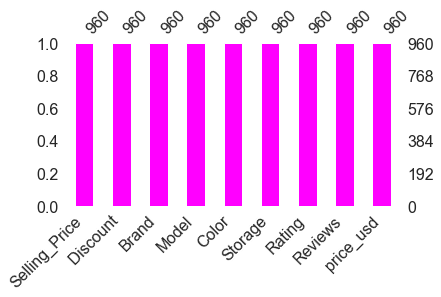

In [110]:
#visualize missing numbers in the dataset
msno.bar(df,figsize=(6,3),color='magenta')

In [111]:
df['Brand'].groupby(df['Brand']).count().sort_values(ascending=False)

Brand
POCO        360
T2x         280
SMART       120
MOTOROLA     80
11           80
7            40
Name: Brand, dtype: int64

In [112]:
sns.set_style("white")

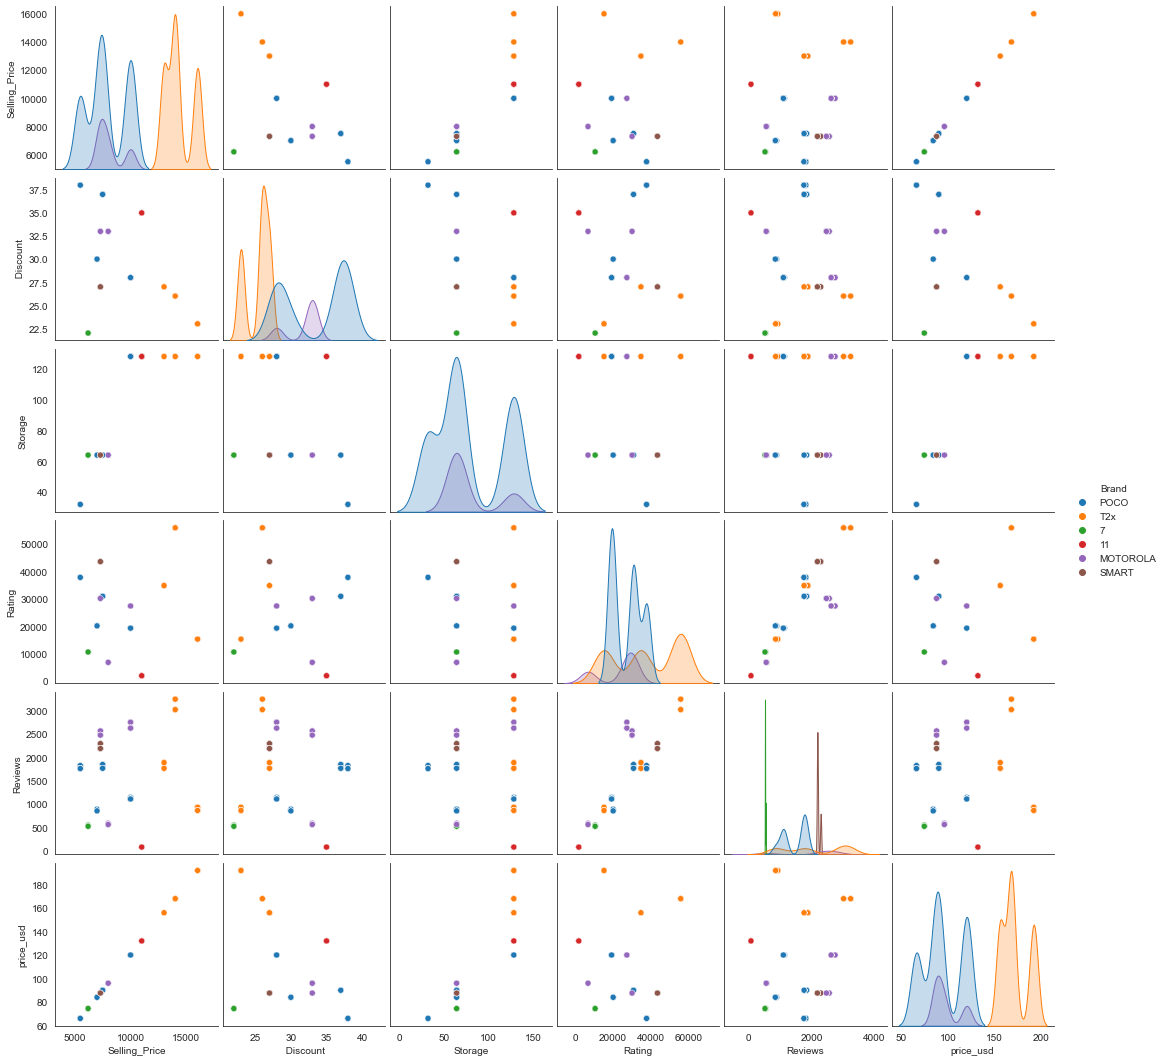

In [113]:
sns.pairplot(df, hue='Brand');

<AxesSubplot:>

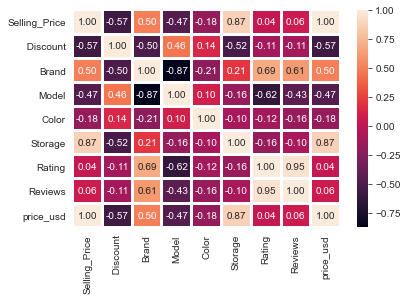

In [143]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)

In [115]:
df.keys()

Index(['Selling_Price', ' Discount', 'Brand', 'Model', 'Color', 'Storage',
       'Rating', 'Reviews', 'price_usd'],
      dtype='object')

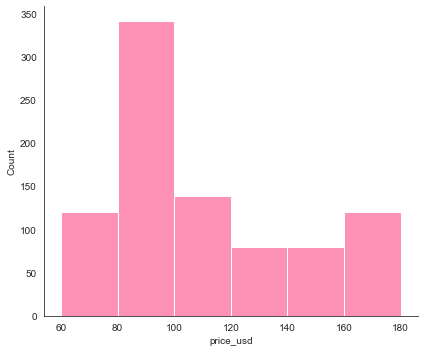

In [116]:
sns.displot(df, x='price_usd',bins=[60,80,100,120,140,160,180], aspect=1.2,color='#fd6c9e')

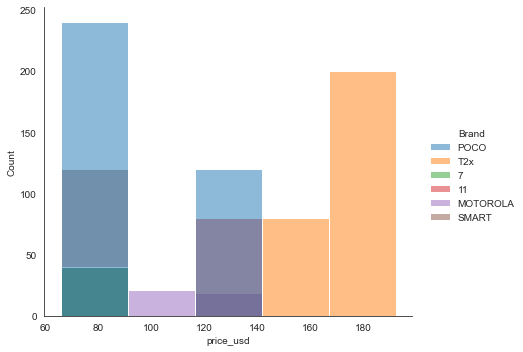

In [117]:
#brandwise mobile phone price segments
sns.displot(df, x='price_usd',bins=5, hue='Brand',aspect=1.2)

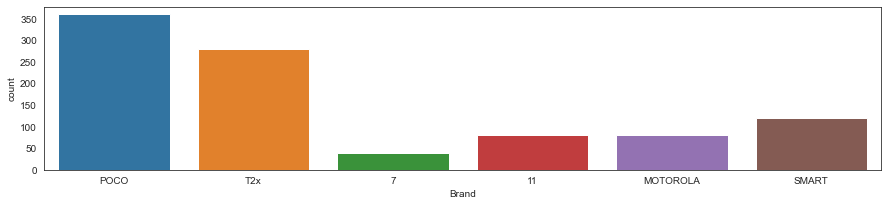

In [118]:
fig, ax = plt.subplots(figsize=(15,3))
ax=sns.countplot(x="Brand", data=df)

Brand Vs. Rating


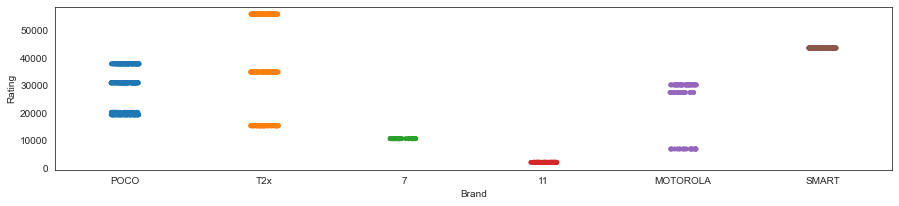

In [119]:
fig, ax = plt.subplots(figsize=(15,3))
ax = sns.stripplot(y="Rating", x="Brand", data=df)
print('Brand Vs. Rating')

Brand Vs. Reviews


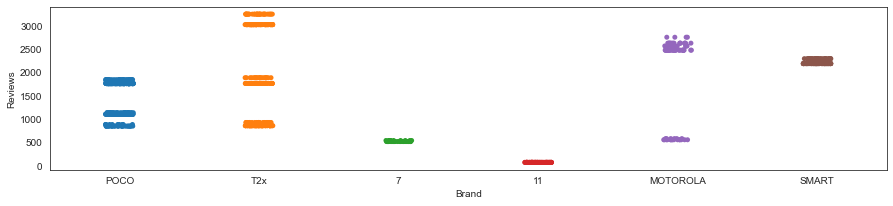

In [120]:
fig, ax = plt.subplots(figsize=(15,3))
ax = sns.stripplot(y="Reviews", x="Brand", data=df)
print('Brand Vs. Reviews')

Brand Vs. price_usd


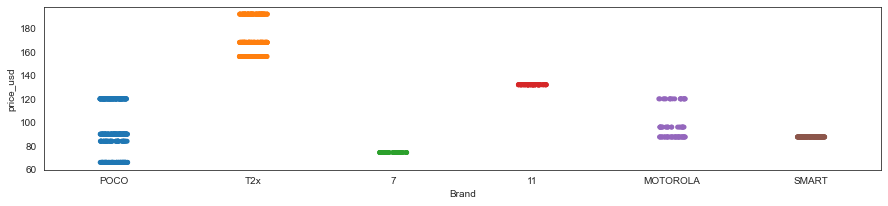

In [121]:
fig, ax = plt.subplots(figsize=(15,3))
ax = sns.stripplot(y="price_usd", x="Brand", data=df)
print('Brand Vs. price_usd')

Price Vs. Brand


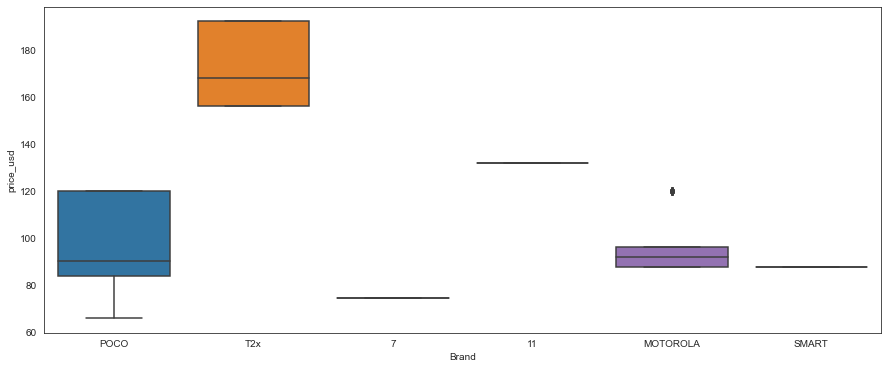

In [122]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x="Brand", y="price_usd", data=df)
print('Price Vs. Brand')

In [123]:
# Brandwise Mean Price_USD
round(df.groupby('Brand')['price_usd'].mean(),0).sort_values(ascending=False)

Brand
T2x         171.0
11          132.0
MOTOROLA     97.0
POCO         94.0
SMART        88.0
7            74.0
Name: price_usd, dtype: float64

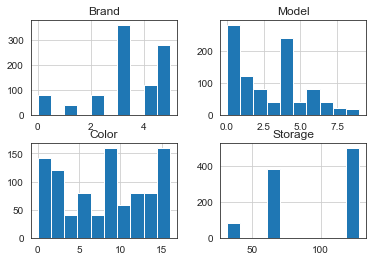

In [137]:
# We can plot each of these features:
viz = cdf[['Brand','Model','Color','Storage']]
viz.hist();
#plt.show()

Most expensive footwear brands

In [138]:
fig = px.treemap(df, path=['Brand', 'Model'], values='price_usd')
fig.show()

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  960 non-null    int64  
 1    Discount      960 non-null    int64  
 2   Brand          960 non-null    object 
 3   Model          960 non-null    object 
 4   Color          960 non-null    object 
 5   Storage        960 non-null    int64  
 6   Rating         960 non-null    int32  
 7   Reviews        960 non-null    int32  
 8   price_usd      960 non-null    float64
dtypes: float64(1), int32(2), int64(3), object(3)
memory usage: 60.1+ KB


# 3. ML (Machine Learning)

In [126]:
#Let's select some features that we want to use for regression.
#cdf = df[[' Discount','Reviews','Rating','price_usd']]
cdf = df
cdf.head(10)

,Selling_Price,Discount,Brand,Model,Color,Storage,Rating,Reviews,price_usd
0,9999,28,POCO,C55,Forest Green,128,19361,1137,119.988
1,5499,38,POCO,C50,Royal Blue,32,37874,1821,65.988
2,7499,37,POCO,C55,Forest Green,64,30975,1844,89.988
3,7499,37,POCO,C55,Power Black,64,30975,1844,89.988
4,7499,37,POCO,C55,Cool Blue,64,30975,1844,89.988
5,9999,28,POCO,C55,Power Black,128,19361,1137,119.988
6,6999,30,POCO,C51,Royal Blue,64,20190,885,83.988
7,15999,23,T2x,5G,Aurora Gold,128,15358,928,191.988
8,15999,23,T2x,5G,Marine Blue,128,15358,928,191.988
9,13999,26,T2x,5G,Glimmer Black,128,55964,3246,167.988


### Using "LabelEncoder"

In [127]:
# initialize a LabelEncoder for each column to encode
le_brand = LabelEncoder()
le_model = LabelEncoder()
le_color = LabelEncoder()

# fit and transform the categorical columns with the LabelEncoders
cdf['Brand'] = le_brand.fit_transform(df['Brand'])
cdf['Model'] = le_model.fit_transform(df['Model'])
cdf['Color'] = le_color.fit_transform(df['Color'])

In [128]:
print(cdf)

     Selling_Price   Discount  Brand  Model  Color  Storage  Rating  Reviews  \
0             9999         28      3      4      8      128   19361     1137   
1             5499         38      3      2     16       32   37874     1821   
2             7499         37      3      4      8       64   30975     1844   
3             7499         37      3      4     15       64   30975     1844   
4             7499         37      3      4      3       64   30975     1844   
..             ...        ...    ...    ...    ...      ...     ...      ...   
955           9999         28      3      4      3      128   19361     1105   
956           7299         27      4      1      6       64   43640     2188   
957           7299         27      4      1     13       64   43640     2188   
958           7299         27      4      1      2       64   43640     2188   
959           7999         33      2      8      0       64    6876      558   

     price_usd  
0      119.988  
1    

### PCA : Principle Component Analysis

In [145]:
from sklearn.decomposition import PCA
# normalize the data
df_norm = (cdf - cdf.mean()) / cdf.std()

# apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_norm)

# print the variance explained by each principal component
print(pca.explained_variance_ratio_)

# print the resulting data with the reduced dimensionality
df_pca = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
print(df_pca)

[0.4644063  0.28088921]
          PC1       PC2
0   -0.104100  1.236541
1   -2.191451 -2.144342
2   -1.539977 -1.017786
3   -1.718031 -0.978308
4   -1.412795 -1.045985
..        ...       ...
955  0.014618  1.226168
956  0.162270 -1.834407
957 -0.015785 -1.794929
958  0.264015 -1.856966
959 -2.544719  1.190154

[960 rows x 2 columns]


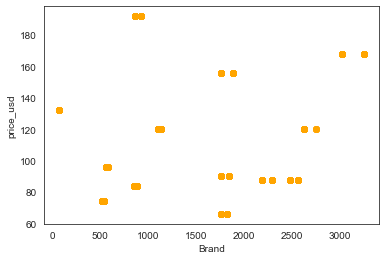

Brand Vs. Price


In [129]:
#Brand
#Let's plot Emission values with respect to Engine size:
plt.scatter(cdf.Reviews, cdf.price_usd,  color='orange')
plt.xlabel("Brand")
plt.ylabel("price_usd")
plt.show()
print('Brand Vs. Price')

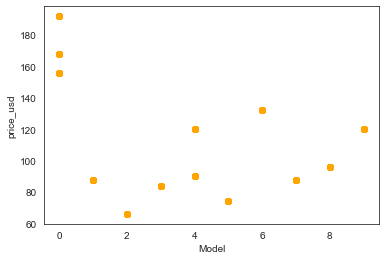

Model Vs. Price


In [130]:
#Model
#Let's plot Emission values with respect to Engine size:
plt.scatter(cdf.Model, cdf.price_usd,  color='orange')
plt.xlabel("Model")
plt.ylabel("price_usd")
plt.show()
print('Model Vs. Price')

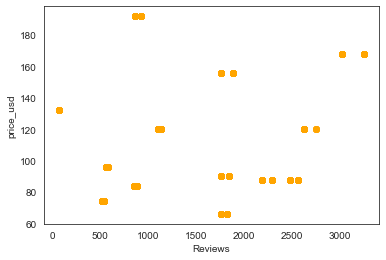

Reviews Vs. Price


In [131]:
#Let's plot Emission values with respect to Engine size:
plt.scatter(cdf.Reviews, cdf.price_usd,  color='orange')
plt.xlabel("Reviews")
plt.ylabel("price_usd")
plt.show()
print('Reviews Vs. Price')

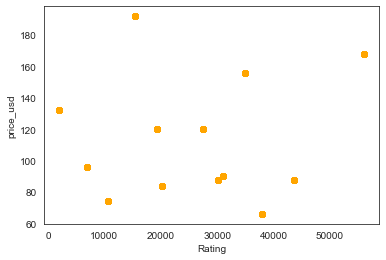

Ratings Vs. Price


In [132]:
#Let's plot Emission values with respect to Engine size:
plt.scatter(cdf.Rating, cdf.price_usd,  color='orange')
plt.xlabel("Rating")
plt.ylabel("price_usd")
plt.show()
print('Ratings Vs. Price')

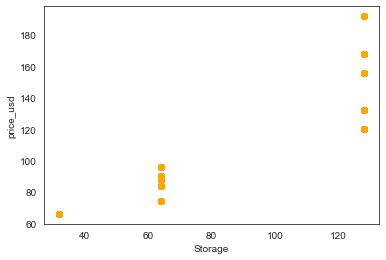

Storage Vs. Price


In [133]:
#Let's plot Emission values with respect to Engine size:
plt.scatter(cdf.Storage, cdf.price_usd,  color='orange')
plt.xlabel("Storage")
plt.ylabel("price_usd")
plt.show()
print('Storage Vs. Price')

### Creating train and test dataset
#### Let's split our dataset into train and test sets. We create a mask to select random rows using the **np.random.rand()** function.
#### How: **80%** Training and **20%** for Testing

In [134]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Multiple Regression Model

In [135]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Brand','Model','Color','Storage','Rating','Reviews']])
y = np.asanyarray(train[['price_usd']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-1.87570053e+00 -1.20525620e+01 -1.84396471e-01  7.17656401e-01
  -3.35967356e-03  5.03705419e-02]]


As mentioned before, Coefficient and Intercept are the parameters of the fitted line. Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ( 𝑦̂ 
 ) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

Solving the model parameters analytically using closed-form equations
Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

### Prediction

In [136]:
y_hat= regr.predict(test[['Brand','Model','Color','Storage','Rating','Reviews']])
x = np.asanyarray(test[['Brand','Model','Color','Storage','Rating','Reviews']])
y = np.asanyarray(test[['price_usd']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 132.98
Variance score: 0.91


### Conclusion
- Brand, Model, Color, Storage are the most importance features that have strong correlation with Selling price.
- Results from statiscial hypotheses testing reflects similarity with model feature importance.
- With 80/20 train/test split triple boosting stacking ensemble model achieved a Variance Socre of 0.91